***Assignment 3: Decision Tree and Random forest classifier***

Consider the attached Breast Cancer Wisconsin dataset from the UCI machine learning repository:   
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. The study of classification of 568 breast Cancers into two classes of Malignant(M) and Benine(B) based on the following 30 attributes.  Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Attribute Information:
1) ID number (Do not use for classification)
2) Diagnosis (M = malignant, B = benign) (Class label)

 3-32)Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features (features 3-32 in the attached file). For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius

Use 5-fold cross validation to evaluate the classification performance of a decision tree and a random forest classifier. Describe which classifier gives you the best performance. Provide the confusion matrix, sensitivity, specificity, total accuracy, F1-score, Roc curve, and area under curve.

Himani Parikh - 1322085


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold,cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve, RocCurveDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df= pd.read_csv("/Users/Himani/Desktop/wdbc.data", sep=",",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#features
X = df.iloc[:, 2:].values
#target
y = df.iloc[:, [1]].values

In [ ]:
# encoding
le = LabelEncoder()
y=le.fit_transform(y)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
cross_validation = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
conf_matrix_list_of_arrays = []
scores = []
sensitivity_scores=[]
specificity_scores=[]
decisionTreeAccuracy=[]
rfAccuracy=[]
tprs, aucs = [], []
mean_fpr = np.linspace(0, 1, 100)

Decision Tree

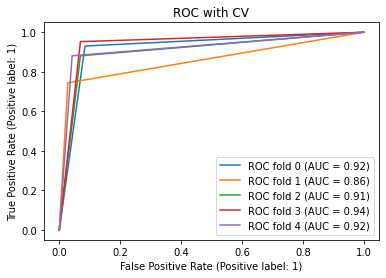

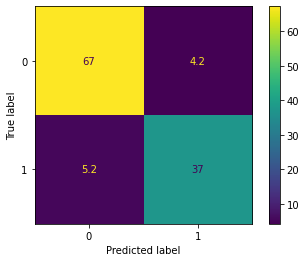

In [ ]:
fig, ax = plt.subplots()
model = DecisionTreeClassifier()

decisionTreeAcc = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= cross_validation, scoring="accuracy")
decisionTreeF1 = cross_val_score(DecisionTreeClassifier(random_state= 42), X, y, cv= cross_validation, scoring="f1")
decisionTreeAUC = cross_val_score(DecisionTreeClassifier(random_state=  42), X, y, cv= cross_validation, scoring="roc_auc")
decisionTreePrecision = cross_val_score(DecisionTreeClassifier(random_state=  42), X, y, cv= cross_validation, scoring="precision")

for index, (train_index, test_index) in enumerate(cross_validation.split(X, y)):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    ac = accuracy_score(y_test,y_pred)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    conf_matrix_list_of_arrays.append(cm)
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    sensitivity_scores.append(sensitivity1)
    specificity_scores.append(specificity1)
    decisionTreeAccuracy.append(ac)

    # ROC-AUC curve
    plot = RocCurveDisplay.from_estimator(
        model, X[test_index], y[test_index],
        name="ROC fold {}".format(index),
        ax=ax)
    interp_tpr = np.interp(mean_fpr, plot.fpr, plot.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(plot.roc_auc)
    ax.set(title="ROC with CV")

mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
disp = ConfusionMatrixDisplay(confusion_matrix=mean_of_conf_matrix_arrays, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
np.mean(decisionTreeAccuracy)

0.9174196553330228

In [ ]:
np.mean(sensitivity_scores)

0.9412363067292644

In [ ]:
np.mean(specificity_scores)

0.8777408637873755

In [ ]:
decisionTreeAcc.mean()

0.9104021114733737

In [ ]:
decisionTreeF1.mean()

0.8757177507158669

In [ ]:
decisionTreeAUC.mean()

0.9000201467201141

In [ ]:
decisionTreePrecision.mean()

0.8963098787517392

Random Forest Classifier

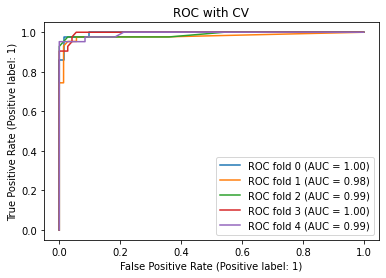

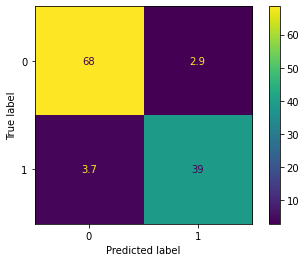

In [ ]:
fig, ax = plt.subplots()
clf = RandomForestClassifier(n_estimators=50)

rfAcc = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv= cross_validation, scoring="accuracy")
rfF1 = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv= cross_validation, scoring="f1")
rfAUC = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv= cross_validation, scoring="roc_auc")
rfPrecision = cross_val_score(RandomForestClassifier(random_state=42), X, y, cv= cross_validation, scoring="precision")

for index, (train_index, test_index) in enumerate(cross_validation.split(X, y)):
    # print("Train Index: ", train_index, "\n")
    # print("Test Index: ", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    ac = accuracy_score(y_test,y_pred)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    conf_matrix_list_of_arrays.append(cm)
    sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
    specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
    sensitivity_scores.append(sensitivity1)
    specificity_scores.append(specificity1)
    rfAccuracy.append(ac)

    # ROC-AUC curve
    plot = RocCurveDisplay.from_estimator(
        clf, X[test_index], y[test_index],
        name="ROC fold {}".format(index),
        ax=ax)
    interp_tpr = np.interp(mean_fpr, plot.fpr, plot.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(plot.roc_auc)
    ax.set(title="ROC with CV")

mean_of_conf_matrix_arrays = np.mean(conf_matrix_list_of_arrays, axis=0)
disp = ConfusionMatrixDisplay(confusion_matrix=mean_of_conf_matrix_arrays,display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
np.mean(rfAccuracy)

0.9666356155876418

In [ ]:
np.mean(sensitivity_scores)

0.9594483568075118

In [ ]:
np.mean(specificity_scores)

0.9129568106312291

In [ ]:
rfAcc.mean()

0.9525850023288308

In [ ]:
rfF1.mean()

0.935778940678539

In [ ]:
rfPrecision.mean()

0.9411340969685

In [ ]:
rfAUC.mean()

0.9887471902907541

Best Performance - Random forest classifier(By seeing Accuracy, Specificity and Sensitivity)